In [1]:
import numpy as np
import scipy as sp
from statsmodels.tsa import ar_model
from statsmodels.tsa import arima_model as arma


C:\Users\i6800309\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


# Simple Time-Series simulation

In [2]:
## simulate ar(p)
alpha = 0.7

def ar(y_last, alpha):
    return alpha * y_last + 0 + np.random.normal(scale=0.01) 
    

In [3]:
def ar_simulate(y_init, alpha, n):
    seq = [y_init]
    for i in range(n-1):
        seq.append(ar(seq[-1], alpha))
    return seq

In [4]:
def moving_window_seq(seq, idx, window_size, apply_fn):
    mvw_seq = []
    for i in idx:
        if i >= window_size:
            mvw_seq.append(apply_fn(seq[i:i+window_size]))

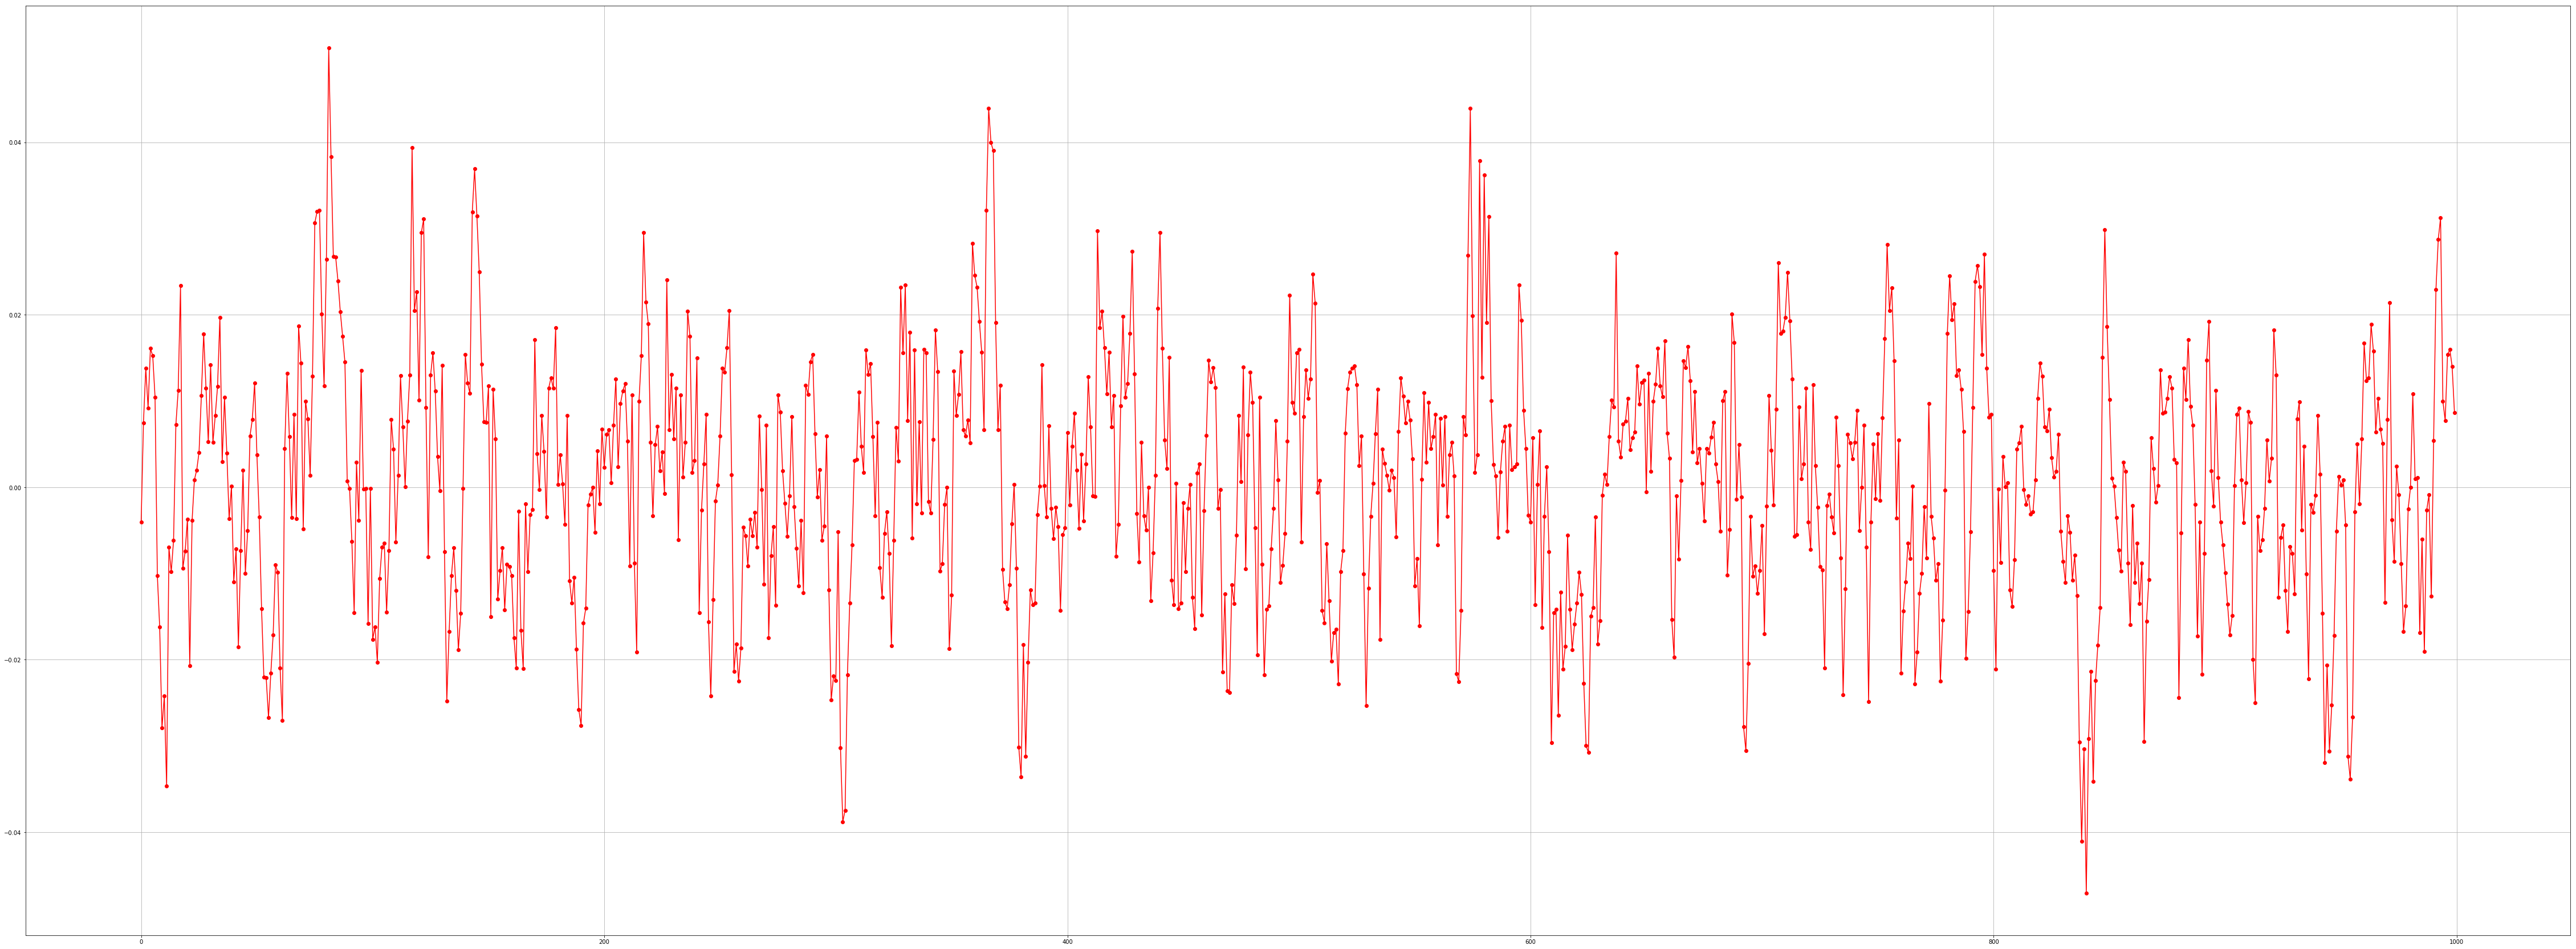

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

ar_seq = ar_simulate(np.random.normal(scale=0.01), alpha, 1000)
plt.figure(figsize=(80, 30))
plt.plot(range(1000), ar_seq, "r-o")
#plt.plot(range(1000), mv_ar_seq)
plt.grid()

In [6]:
# ACF
def acf(order, data):
    acf_list = []
    for i in range(order):
        acf_list.append(np.corrcoef(data[:-(i+1)], data[i+1:])[0, 1])
    return acf_list

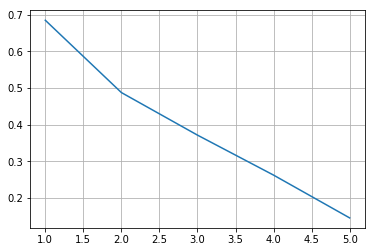

In [7]:
acf_seq = acf(5, ar_seq)
plt.plot(range(1, 6), acf_seq)
plt.grid()

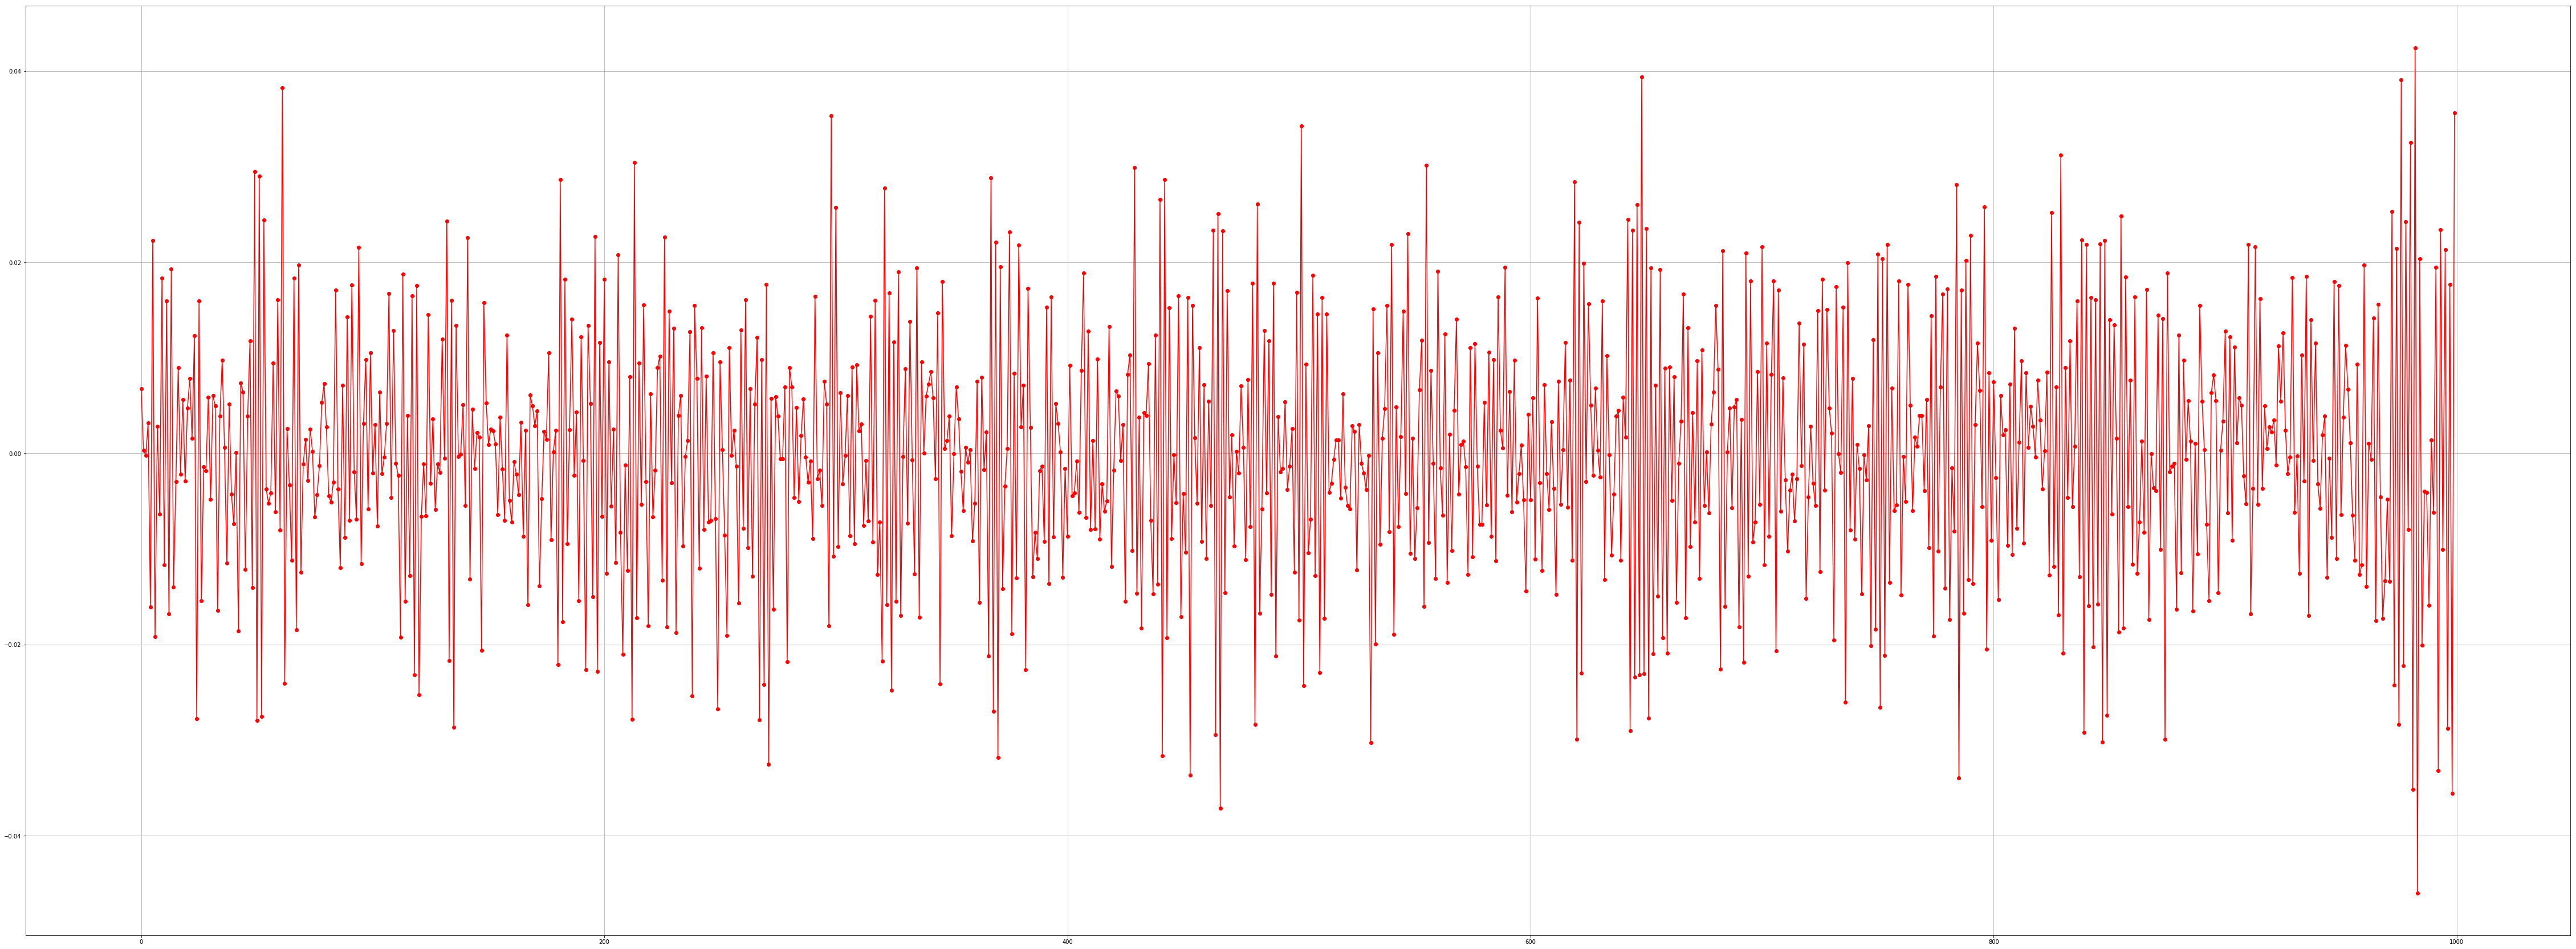

In [8]:
ar_neg_seq = ar_simulate(np.random.normal(scale=0.01), -alpha, n=1000)
plt.figure(figsize=(80, 30))
plt.plot(range(1000), ar_neg_seq, "r-o")
plt.grid()

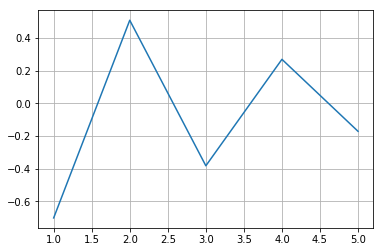

In [9]:
# The acf of AR should be converge to 0 and oscillate 
acf_neg_seq = acf(5, ar_neg_seq)
plt.plot(range(1, 6), acf_neg_seq)
plt.grid()

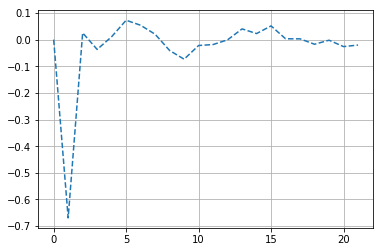

In [10]:
model = ar_model.AR(endog=ar_neg_seq)
p = model.fit()
plt.plot(range(p.params.shape[0]), p.params, "--") #PACF
plt.grid()

In [11]:
# simulate MA model, MA model is composed by a sequence of moving average of lagged residual.
def ma(residual_last, theta):
    res_current = np.random.normal(scale=0.01)
    return res_current - theta * residual_last, res_current

In [12]:
def ma_simulate(init_residual, theta, n):
    ma_seq = []
    res_last = init_residual
    for i in range(n-1):
        y_t, res_current = ma(res_last, theta)
        ma_seq.append(y_t)
        res_last = res_current
    return ma_seq

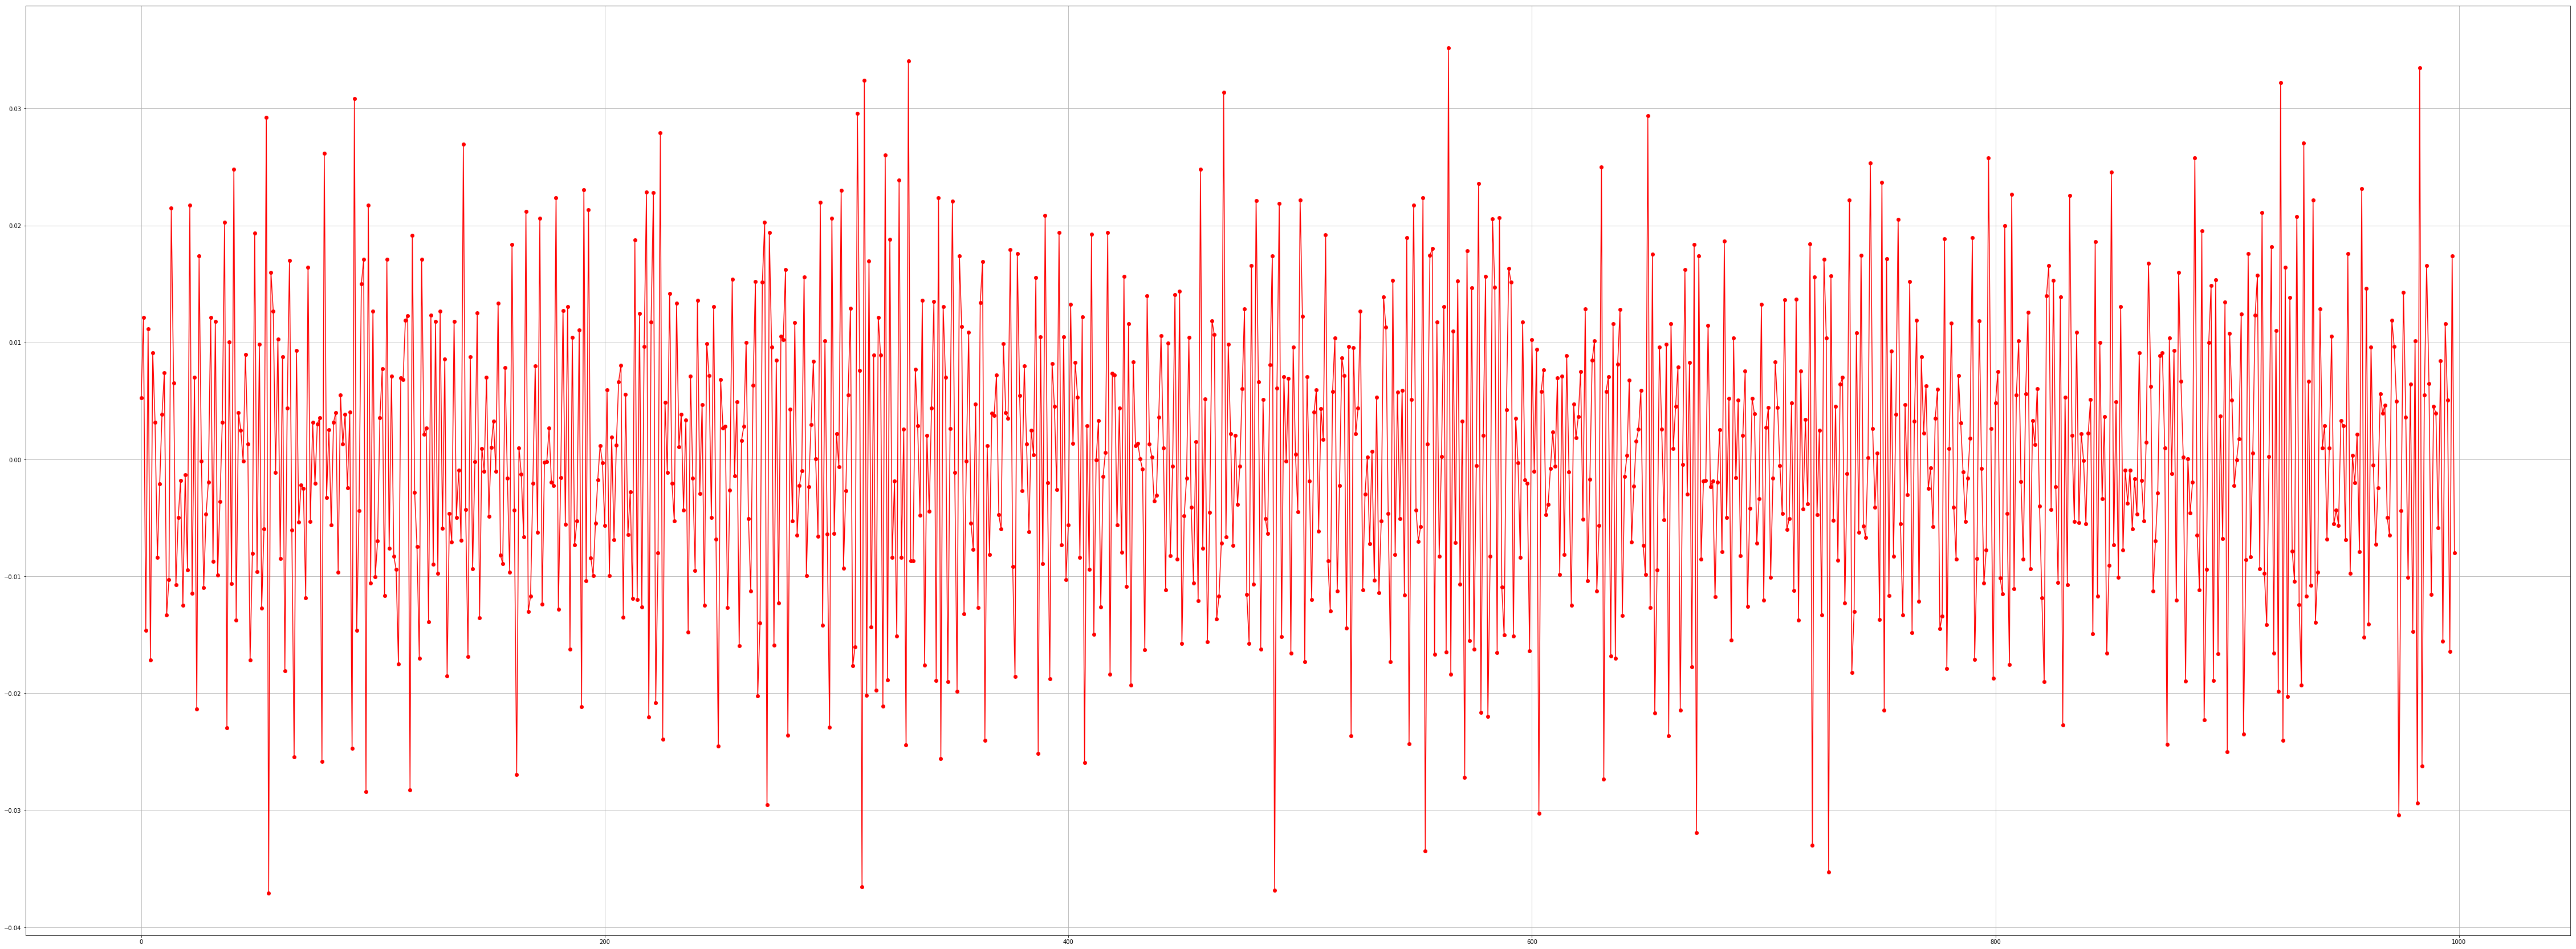

In [13]:
ma_seq = ma_simulate(np.random.normal(scale=0.01), theta=0.7, n=1000)
plt.figure(figsize=(80, 30))
plt.plot(range(1000-1), ma_seq, "r-o")
plt.grid()

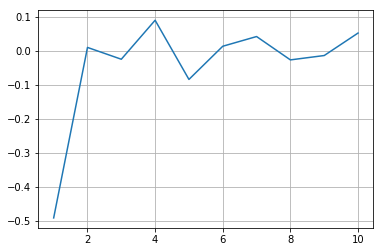

In [14]:
ma_acf_seq = acf(10, ma_seq)
plt.plot(range(1, 11), ma_acf_seq)
plt.grid()

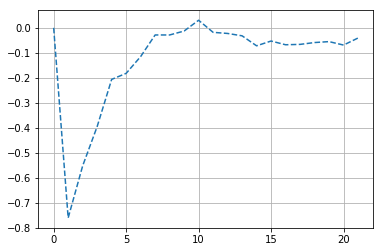

In [15]:
model = ar_model.AR(endog=ma_seq)
p = model.fit()
plt.plot(range(p.params.shape[0]), p.params, "--") #PACF
plt.grid()

In [16]:
# Convolution, is equilalant with univariate auto regression.
def conv(seq, filter_weights, stride):
    filter_size = len(filter_weights)
    result = []
    n_out = int(np.floor((len(seq) - filter_size) / stride)) + 1
    for i in range(n_out):
        val = np.sum(np.multiply(seq[i*stride:i*stride+filter_size], filter_weights))
        result.append(val)
    return result

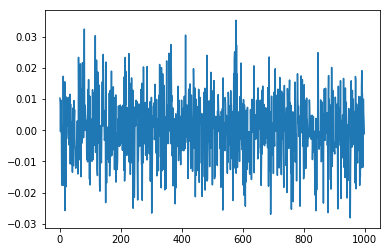

In [17]:
res = conv(ar_seq, [-alpha, 1], 1)
plt.plot(range(len(res)), res)

(array([  10.,   10.,   15.,   37.,   42.,   60.,   70.,  129.,  113.,
         154.,  109.,   98.,   64.,   37.,   20.,   15.,   10.,    2.,
           2.,    2.]),
 array([-0.0281231 , -0.02495356, -0.02178403, -0.0186145 , -0.01544496,
        -0.01227543, -0.0091059 , -0.00593636, -0.00276683,  0.0004027 ,
         0.00357224,  0.00674177,  0.0099113 ,  0.01308084,  0.01625037,
         0.0194199 ,  0.02258944,  0.02575897,  0.02892851,  0.03209804,
         0.03526757]),
 <a list of 20 Patch objects>)

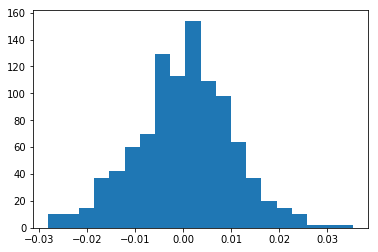

In [18]:
plt.hist(res, bins=20)

In [19]:
def deconv(seq, filter_weights, stride):
    pass

In [20]:
# stochastic model for forex
def forex(mu, sigma, y_last):
    return mu * y_last + sigma* np.random.normal() + y_last

In [21]:
def forex_simulate(mu, sigma, y_init, n):
    seq = [y_init]
    for i in range(n-1):
        seq.append(forex(mu, sigma, seq[-1]))
    return seq

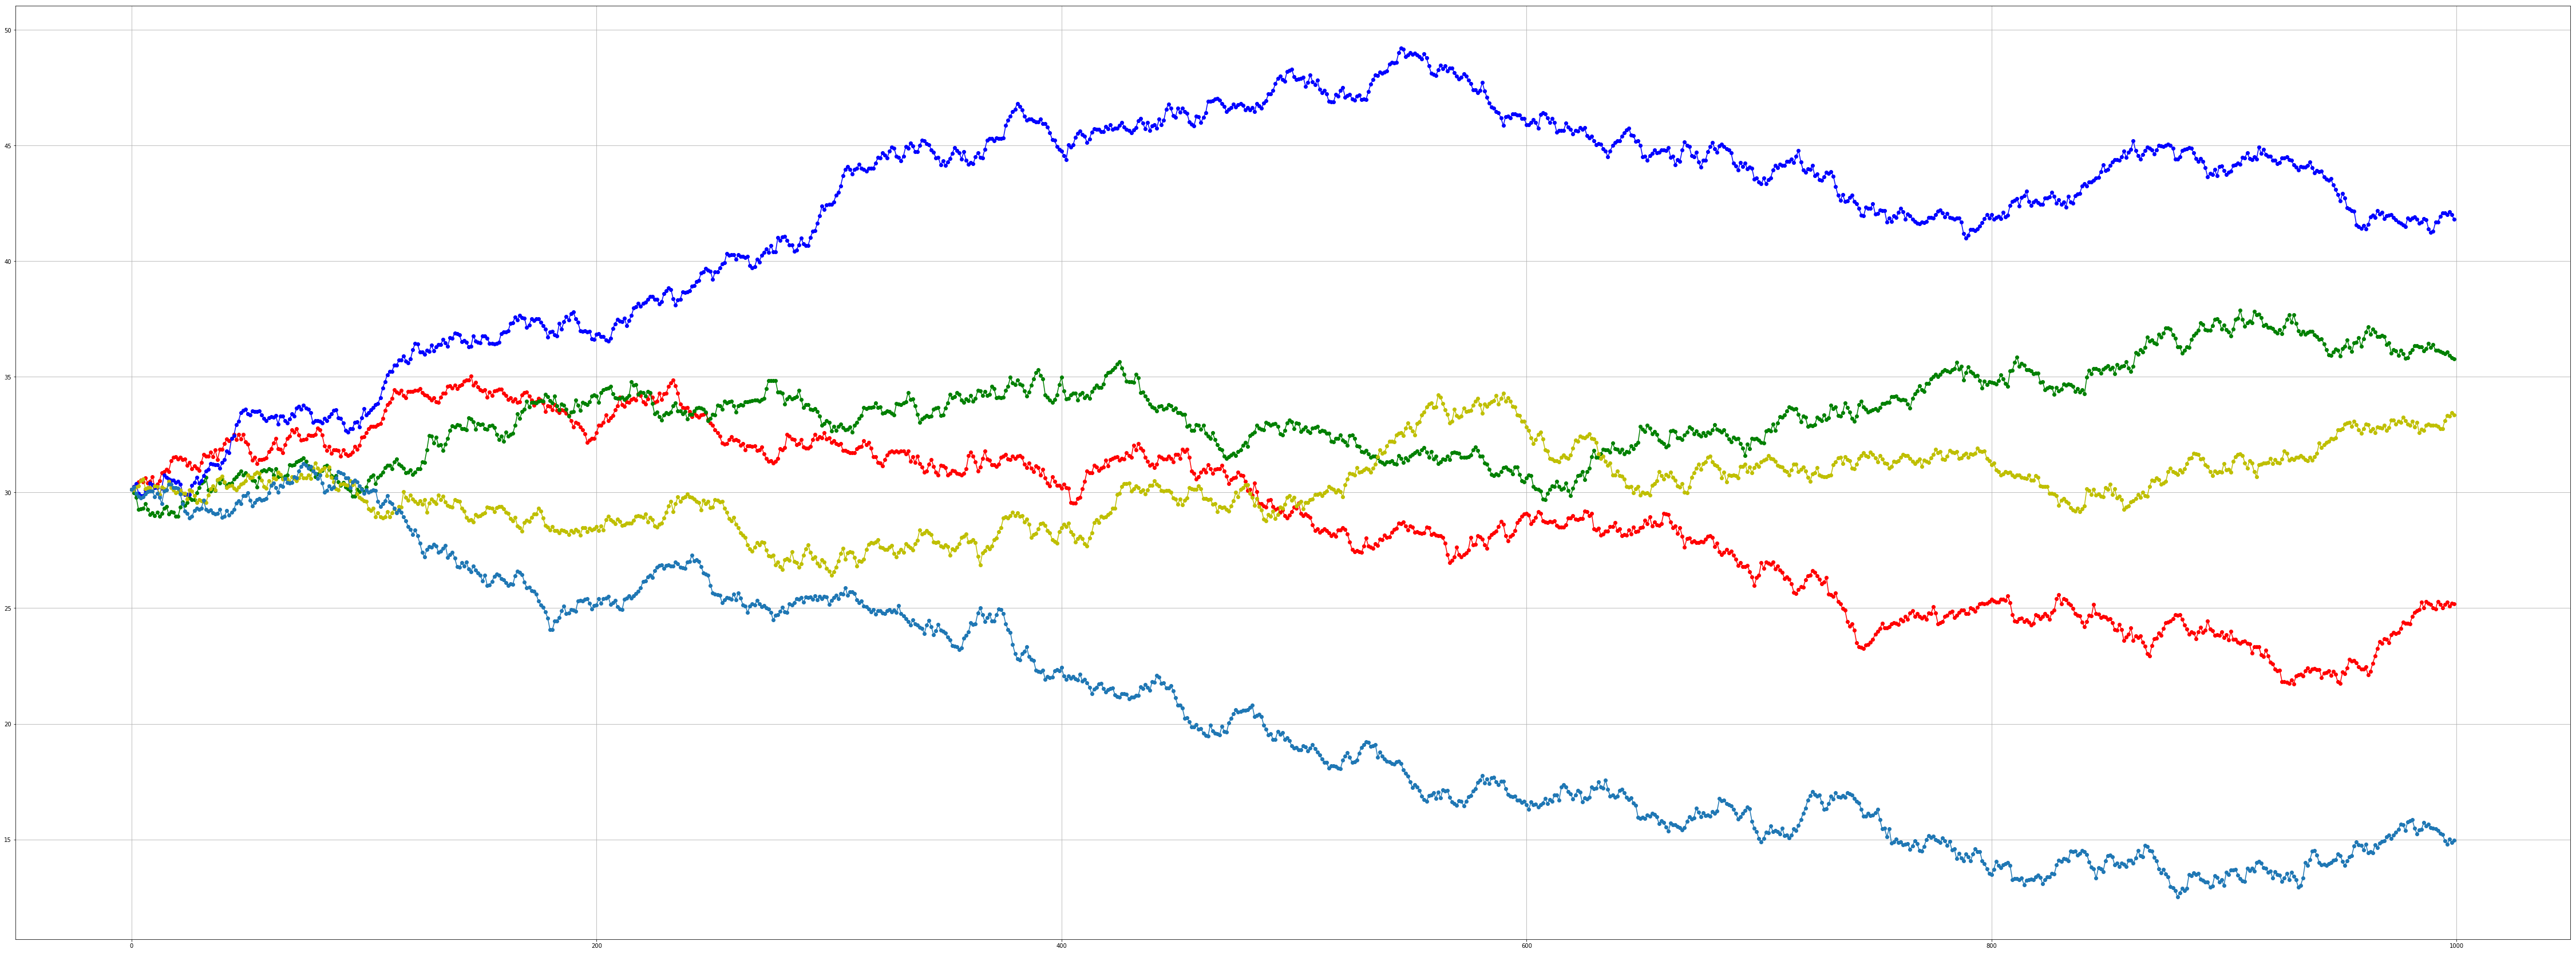

In [22]:
plt.figure(figsize=(80, 30))
cms = ['r', 'g', 'b', 'y', '']
for i in range(5):
    forex_seq = forex_simulate(0.0001, 0.2, 30.123, 1000)
    plt.plot(range(1000), forex_seq, cms[i]+"-o")
plt.grid()

In [23]:
# momentum of price

# Agent-Based Model

In [188]:
# model-based Agent 
from collections import defaultdict
from abc import ABCMeta, abstractmethod

class Model(object):
    """Define the dynamics of p(r, s'| s, a)"""
    def __init__(self):
        pass

    
class QTable(object):
    
    def __init__(self, record_steps=20):
        self._record_steps = record_steps
        self.q = defaultdict(lambda: defaultdict(lambda: 0))
        self._names = ['obs', 'state_nexts', 'actions', 'rewards']
        self._q_hist = []
    
    def update_q(self, state, action, val):
        self.q[state][action] += val
    

class Agent(ABCMeta):
    pass

    
class Policy(object):
    
    def act(self, state):
        pass

    
class Agent(ABCMeta):
    
    """new inital the class
    if the subclass is a subclass of Policy we make the 
    subclass into a Policy-Gradient Agent.
    If it is a Q-Table then we make a Value-based
    agent."""
    
    def __init__(self, algo):
        self._update_freq = algo.update_freq

    @classmethod
    def __subclasshook__(cls, hookedsubcls):
        return issubclass(hookedsubcls, Policy) or issubclass(hookedsubcls, QTable)
    
    @abstractmethod
    def make(self, env):
        self.__init__(env)
        raise NotImplementedError    
    
class ContinuousPolicy(object):
    def __init__(self):
        pass


In [299]:
from collections import defaultdict
from matplotlib import pyplot as plt
# fast weights 
# 1. Baysian weights p(y|x) = p(x|y) * p(y) / p(x) non-parametric baysian

class LinearPolicy(ContinuousPolicy):
    
    """Linear Policy Policy."""
    
    def __init__(self, action_space, state_space):
        if action_space.size == -1:
            self._beta = np.random.normal(size=(state_space, action_space))
            self._bias = np.zeros(action_space)
            self.act = lambda state: self._linear_act(state)
        
        else:
            self._table = defaultdict(lambda: defaultdict(lambda: 0))
            self.act = lambda state: self._discrete_act(state)
    
    def _linear_update_params(self, delta):
        self._beta += delta["beta"]
        self._bias += delta["bias"]
    
    def _discrete_update_params(self, delta):
        # cls, 
        self._table
        
    def _linear_act(self, state):
        return np.dot(state, self._beta) + self._bias
    
    def _discrete_act(self, state):
        return self._table[state]

    def policy_gradient(self, actions, state):
        """ \patial log p(x; \theta) = - (\hat_a - a) / sigma * \hat_a"""
        grad = (self.act(state) - actions)
        return {"beta": np.dot(state.T, grad)/len(grad), "bias": grad}
    
    def update(self, actions, state, egligity, lr):
        grads = self.policy_gradient(actions, state)
        delta = {param: lr * grad * eligility for param, grad in grads.items()}
        self.update_params(delta)
    
    def act(self, state):
        pass


def softmax(x, axis=1):
    a = np.exp(x)
    return a / a.sum(axis=axis, keepdims=True)


class DiscretePolicy(Policy):
    
    """Discrete Policy. #NOTE due to the data structure, we only takes
    discrete state space as input space."""
    
    _update_freq = "after-episode"
    
    def __init__(self, state_space, action_space):
        self._x_table = np.ones((state_space, action_space)) * 0.5 # x stands for the x of softmax(x) 
        
        self._state_space = state_space 
        self._action_space = action_space
        
    def _dis_grad(self, states, actions):
        p_grad = np.zeros((self._state_space, self._action_space, len(states)))  # sparse gradient
        
        # softmax gradient
        p = softmax(self._x_table)
        p_grad[states, actions, range(len(states))] = 1 - p[states, actions]
        return p_grad

    def update(self, states, actions, reward, baseline, beta, lr):
        """If it is just purely Policy-Gradient method the update method 
        should be called at the end of the episode."""
 
        grad = self._dis_grad(states, actions)
        n_sample = (grad != 0).sum(2)
        n_sample[n_sample == 0] = 1
        
        print("rewards: {}".format(reward))
        print("grad: {}".format(np.tensordot(grad, (reward - baseline), [2, 0]) / n_sample))
        print("x_table: {}".format(self._x_table))
        
        # plt.matshow(self._x_table)
        # plt.show()
        self._x_table += lr * np.tensordot(
            grad, (self._discount_reward(reward, beta) - baseline), [2, 0]) / n_sample
    
    @staticmethod
    def _discount_reward(values, beta):
        """This part is very crucial for financial application. 
        Discount model(interest rate), 
            #Discrete discounted
        """
        temp = []
        for i in range(len(values)):
            if i == 0:
                temp.append(np.npv(1/beta - 1, values))
            else:
                temp.append(values[i]+temp[-1]*(1/beta - 1))
        return np.array(temp)
        
    def _sample(self, acts, p, size):
        """parameter fixed sampling"""
        return np.random.choice(acts, p=p, size=size)
    
    def act(self, state):
        return self._sample(range(self._x_table.shape[1]), softmax(
            self._x_table[state], axis=0), size=1)
    
    def _monitor(self, rewards):
        """ Since the Reward singal can affect the Policy Gradient Agent very much,
        the best monitor tool is to monitor the sparseness of the reward singnal"""
        return np.var(rewards)
    
    @classmethod
    def make(cls, env):
        cls = cls(action_space=env.action_space.n, state_space=env.observation_space.n)
        return cls

# 
def _test():
    p_table = np.ones((10, 14))# np.random.normal(size=(10, 14))
    states, actions = np.random.randint(10, size=123), np.random.randint(14, size=123)
    temp = np.zeros((10, 14, len(states)))
    idx = list(zip(states, actions, range(123)))
    agent = DiscretePolicy(state_space=10, action_space=14)
    agent.update(states, actions, np.random.normal(size=123), 0, 0.1, 0.1)
    print(softmax(agent._x_table).sum(1))
    #print(np.tensordot(np.random.normal(size=(10, 14, 123)), np.random.normal(size=123), [2, 0]).shape)

    
class QCritiquer(QTable):
    
    _update_freq = "every_step"
    
    def __doc__(self):
        u"""
            Properties of Q Learning:
                off-policy:
                    using r_{t} + max_{a} q(s, a) as boostraping R
        
            Drawback of Q learning:
                Over estimate the action value function.(Not consistant)
        """
        pass
    
    def __init__(self, action_space, *arg, **kwarg):
        super(QCritiquer, self).__init__(*arg, **kwarg)
        
        self._action_space = action_space   
        self.boostrap = self._q_boostrap
    
        
    def _q_boostrap(self, state):
        """off-policy."""
        return np.max(list(self.q[state].values())+[0])
    
    def _td_boostrap(self, state):
        """on-policy."""
        ##TODO: move this to another place
        return self.q[self._policy.act(state)]
    
    def update(self, states, states_next, actions, rewards, lr, beta):
        td_losses = []        
        for state, state_next, action, reward in zip(states, states_next, actions, rewards):
            q = self.q[state][action]

            print("Q tabular:{}".format(self.q))
            print("TD-Error: {}".format((reward + beta * self.boostrap(state_next))-q))
            delta_q = lr * (reward + beta * self.boostrap(state_next) - q) # q learning update
            self.update_q(state, action, delta_q)
            td_losses.append(delta_q)
        return td_losses
    
    def act(self, state):
        # epsilon
        epsilon = np.random.binomial(1, p=1e-4)
        return (1-epsilon) * np.argmax(self.q[state]) + epsilon * self._action_space.sample()
    
    @classmethod
    def make(cls, env):
        cls = cls(action_space=env.action_space)
        return cls
    

class TDlearner(QCritiquer):
    pass
    
    
class ACTORCRITIQUE(object):
    
    update_freq = "every_step"
    # double q and REINFORCE. simple as fuck.
    
    def __init__(self, env, polcy, critiquer):
        self._env = env
        self._policy = policy
        self._judger = critiquer
    
    def update(self, states, states_next, actions, rewards, lr, gamma):
    
        # UPDATE Q-TABLE
        td_losses = self._judger.update(states, states_next, actions, rewards, lr, gamma)
        
        # UPDATE POLICY
        self._policy.update(states, actions, td_losses, lr, gamma)
        
    def act(self, state):
        return self._policy.act(state)

In [300]:
class MemoryReplay(object):
    
    def __init__(self, memory_size=100):
        self._memory_size = memory_size
        self._memory_buffer = None
        self._info_buffer = []

    def random_play(self, env):
        print("Random Playing:{}".format(str(env)))
        obs = env.reset()
        
        for i in range(self._memory_size):
            act = env.action_space.sample()
            state_next, reward, terminal, info = env.step(act)
            self.experience_update(obs, state_next, act, reward, terminal, info)
            
            # update the next period's observation
            obs = state_next
            if terminal == True:
                obs = env.reset()
                terminal = False
        print("Random Play Done.")
                
    def experience_update(self, obs, state_next, act, reward, terminal, info):
        if self._memory_buffer is None:
            self._memory_buffer = np.array([[obs, state_next, act, reward, terminal]])
        else:
            self._memory_buffer = np.vstack([self._memory_buffer, 
                                             np.array([obs, state_next, act, reward, terminal])])
            
    def sample_batch(self, batch_size):
        idx = np.random.choice(range(self._memory_size), batch_size)
        return self._memory_buffer[idx]


In [301]:
class PlayGround(object):
    
    def __init__(self, envs, agents, batch_size, 
                 memory_size, lr, beta):
        self._envs = envs
        self._agents = agents
        
        self._memory_pool = MemoryReplay(
            memory_size=memory_size)
        
        self._batch_size = batch_size
        self.lr = lr
        self.beta = beta
    
    def _step_loop(self, agent, env, obs, lr):
        print(agent)
        action = agent.act(obs)
        state_next, reward, terminal, info = env.step(action)
        
        # update the memeory.
        self._memory_pool.experience_update(obs, state_next, 
                                            action, reward, terminal, info)
        
        if agent._update_freq == "every_step":
            batch = self._memory_pool.sample_batch(self._batch_size)
            agent.update(batch[:, 0], batch[:, 1], batch[:, 2], 
                         batch[:, 3],  lr, self.beta)
            
        return state_next, terminal, info
    
    def _before_episode(self, agent, env):
        if hasattr(agent, "call_back_before_ep"):
            agent.call_back_before_ep(self)
    
    def _after_episode(self, agent, env):
        if agent._update_freq == "after_episode":
            agent.update()
            
        if hasattr(agent, "call_back_freq"):
            if agent.call_back_freq == "after_episode":
                agent.call_back(self)
   
    def main_loop(self, n_games):
        for env in self._envs:
            self._env_info_log(env)
            lr = self.lr
            n = 1
            for agent in self._agents:
    
                agent = agent.make(env)
                
                for i in range(n_games):
                    obs = env.reset()
                    terminal = False
                    self._before_episode(agent, env)
                    self._memory_pool.random_play(env) # memory replay
  
                    while terminal is False:
                        state, terminal, info = \
                            self._step_loop(agent, env, obs, lr)
                        
                        obs = state
                        n += 1

                    self._after_episode(agent, env)
    
    def play(self, n_games):
        self.main_loop(n_games)
    
    def _env_info_log(self, env):
        print()
        print("Game Discription")
        print("Eviorment Name: {}".format(str(env)))
        print("Action Space: {}".format(env.action_space))
        print("Observation Space: {}".format(env.observation_space))

In [302]:
# test the agent 
# 
from gym import envs as gym_envs
# Under this experiment we can tell the q learning overestimatet the action value function
env1 = gym_envs.make("OneRoundDeterministicReward-v0") # bandit problem 
env2 = gym_envs.make("TwoRoundDeterministicReward-v0")

playground = PlayGround(envs=[env1, env2], agents=[QCritiquer, DiscretePolicy], 
                        memory_size=100, batch_size=10, lr=1e-2, beta=0.01)

playground.play(n_games=100)



Game Discription
Eviorment Name: <OneRoundDeterministicRewardEnv<OneRoundDeterministicReward-v0>>
Action Space: Discrete(2)
Observation Space: Discrete(1)
Random Playing:<OneRoundDeterministicRewardEnv<OneRoundDeterministicReward-v0>>
Random Play Done.
Q tabular:defaultdict(<function QTable.__init__.<locals>.<lambda> at 0x00000000081F40D0>, {0: defaultdict(<function QTable.__init__.<locals>.<lambda>.<locals>.<lambda> at 0x00000000081F4620>, {1: 0})})
TD-Error: 1.0
Q tabular:defaultdict(<function QTable.__init__.<locals>.<lambda> at 0x00000000081F40D0>, {0: defaultdict(<function QTable.__init__.<locals>.<lambda>.<locals>.<lambda> at 0x00000000081F4620>, {1: 0.01, 0: 0})})
TD-Error: 0.0001
Q tabular:defaultdict(<function QTable.__init__.<locals>.<lambda> at 0x00000000081F40D0>, {0: defaultdict(<function QTable.__init__.<locals>.<lambda>.<locals>.<lambda> at 0x00000000081F4620>, {1: 0.01, 0: 1.0000000000000002e-06})})
TD-Error: 0.9901
Q tabular:defaultdict(<function QTable.__init__.<loca

TD-Error: 0.20353995860637097
Q tabular:defaultdict(<function QTable.__init__.<locals>.<lambda> at 0x00000000081F40D0>, {0: defaultdict(<function QTable.__init__.<locals>.<lambda>.<locals>.<lambda> at 0x00000000081F4620>, {1: 0.8065404919028607, 0: 0.0046277425579379951})})
TD-Error: 0.20152491301616782
Q tabular:defaultdict(<function QTable.__init__.<locals>.<lambda> at 0x00000000081F40D0>, {0: defaultdict(<function QTable.__init__.<locals>.<lambda>.<locals>.<lambda> at 0x00000000081F4620>, {1: 0.80855574103302241, 0: 0.0046277425579379951})})
TD-Error: 0.19952981637730782
Q tabular:defaultdict(<function QTable.__init__.<locals>.<lambda> at 0x00000000081F40D0>, {0: defaultdict(<function QTable.__init__.<locals>.<lambda>.<locals>.<lambda> at 0x00000000081F4620>, {1: 0.8105510391967955, 0: 0.0046277425579379951})})
TD-Error: 0.19755447119517255
Q tabular:defaultdict(<function QTable.__init__.<locals>.<lambda> at 0x00000000081F40D0>, {0: defaultdict(<function QTable.__init__.<locals>.<la

Random Play Done.
Q tabular:defaultdict(<function QTable.__init__.<locals>.<lambda> at 0x00000000081F40D0>, {0: defaultdict(<function QTable.__init__.<locals>.<lambda>.<locals>.<lambda> at 0x00000000081F4620>, {1: 0.98414373656648235, 0: 0.0089581379080402156})})
TD-Error: 0.0008832994576246089
Q tabular:defaultdict(<function QTable.__init__.<locals>.<lambda> at 0x00000000081F40D0>, {0: defaultdict(<function QTable.__init__.<locals>.<lambda>.<locals>.<lambda> at 0x00000000081F4620>, {1: 0.98414373656648235, 0: 0.0089669709026164619})})
TD-Error: 0.0008744664630483626
Q tabular:defaultdict(<function QTable.__init__.<locals>.<lambda> at 0x00000000081F40D0>, {0: defaultdict(<function QTable.__init__.<locals>.<lambda>.<locals>.<lambda> at 0x00000000081F4620>, {1: 0.98414373656648235, 0: 0.008975715567246946})})
TD-Error: 0.025697700799182432
Q tabular:defaultdict(<function QTable.__init__.<locals>.<lambda> at 0x00000000081F40D0>, {0: defaultdict(<function QTable.__init__.<locals>.<lambda>.

AssertionError: 

In [177]:
# test the agent 
from gym import envs as gym_envs
env1 = gym_envs.make("OneRoundDeterministicReward-v0")
env2 = gym_envs.make("FrozenLake-v0")

def play(envs, agents, n_games=500):
    for env in envs:
        for agent in agents:
            
            print()
            print("Game Discription")
            print("Eviorment Name: {}".format(str(env)))
            print("Action Space: {}".format(env.action_space))
            print("Observation Space: {}".format(env.observation_space))
            
            agent_ = agent(state_space=env.observation_space.n, 
                           action_space=env.action_space.n)
 
            episode = 0
            terminal = False
            
            
            while episode < n_games:
                n_steps = 0
                observation = env.reset()
                states = []
                observations = []
                rewards = []
                actions = []
                # episoide
                while terminal == False:
                    print("\nepisode: {}, n_steps: {}".format(episode, n_steps))
                    
                    action = agent_.act(observation)
                    state, reward, terminal, info = env.step(action[0])
                    print("state: {}, reward: {}, action: {}".format(
                        state, reward, action.tolist()[0]))
                    print("current policy :\n   {}".format(str(softmax(agent_._x_table, axis=1))))
                    try:
                        print("GAME: \n"+str(env.render()))
                    except:
                        pass
                    # Append the data for current step
                    observations.append(observation)
                    states.append(state)
                    rewards.append(reward)
                    actions.extend(action.tolist())
                    
                    # UPDATE FOR the next step
                    observation = state
                    n_steps += 1
                
                # epioide end
                agent_.update(np.array(states).astype(int), 
                              np.array(actions).astype(int), np.array(rewards), 
                              baseline=0, lr=1e-2, beta=1)
                episode += 1
                terminal = False

In [98]:
# testing
np.seterr(divide='raise', invalid='raise')
agents = [DiscretePolicy]
learns = []
env = [env1, env2]
play(env, agents)


Game Discription
Eviorment Name: <OneRoundDeterministicRewardEnv<OneRoundDeterministicReward-v0>>
Action Space: Discrete(2)
Observation Space: Discrete(1)

episode: 0, n_steps: 0
state: 0, reward: 0, action: 0
current policy :
   [[ 0.5  0.5]]
rewards: [0]
grad: [[ 0.  0.]]
x_table: [[ 0.5  0.5]]

episode: 1, n_steps: 0
state: 0, reward: 1, action: 1
current policy :
   [[ 0.5  0.5]]
rewards: [1]
grad: [[ 0.   0.5]]
x_table: [[ 0.5  0.5]]

episode: 2, n_steps: 0
state: 0, reward: 1, action: 1
current policy :
   [[ 0.49875  0.50125]]
rewards: [1]
grad: [[ 0.       0.49875]]
x_table: [[ 0.5    0.505]]

episode: 3, n_steps: 0
state: 0, reward: 0, action: 0
current policy :
   [[ 0.49750315  0.50249685]]
rewards: [0]
grad: [[ 0.  0.]]
x_table: [[ 0.5        0.5099875]]

episode: 4, n_steps: 0
state: 0, reward: 0, action: 0
current policy :
   [[ 0.49750315  0.50249685]]
rewards: [0]
grad: [[ 0.  0.]]
x_table: [[ 0.5        0.5099875]]

episode: 5, n_steps: 0
state: 0, reward: 0, action: 

grad: [[ 0.  0.]]
x_table: [[ 0.5         0.60716135]]

episode: 57, n_steps: 0
state: 0, reward: 0, action: 0
current policy :
   [[ 0.47323527  0.52676473]]
rewards: [0]
grad: [[ 0.  0.]]
x_table: [[ 0.5         0.60716135]]

episode: 58, n_steps: 0
state: 0, reward: 1, action: 1
current policy :
   [[ 0.47323527  0.52676473]]
rewards: [1]
grad: [[ 0.          0.47323527]]
x_table: [[ 0.5         0.60716135]]

episode: 59, n_steps: 0
state: 0, reward: 1, action: 1
current policy :
   [[ 0.47205572  0.52794428]]
rewards: [1]
grad: [[ 0.          0.47205572]]
x_table: [[ 0.5         0.61189371]]

episode: 60, n_steps: 0
state: 0, reward: 1, action: 1
current policy :
   [[ 0.47087943  0.52912057]]
rewards: [1]
grad: [[ 0.          0.47087943]]
x_table: [[ 0.5         0.61661426]]

episode: 61, n_steps: 0
state: 0, reward: 0, action: 0
current policy :
   [[ 0.46970638  0.53029362]]
rewards: [0]
grad: [[ 0.  0.]]
x_table: [[ 0.5         0.62132306]]

episode: 62, n_steps: 0
state: 0, re

x_table: [[ 0.5         1.34487053]]

episode: 384, n_steps: 0
state: 0, reward: 0, action: 0
current policy :
   [[ 0.29987868  0.70012132]]
rewards: [0]
grad: [[ 0.  0.]]
x_table: [[ 0.5         1.34787563]]

episode: 385, n_steps: 0
state: 0, reward: 0, action: 0
current policy :
   [[ 0.29987868  0.70012132]]
rewards: [0]
grad: [[ 0.  0.]]
x_table: [[ 0.5         1.34787563]]

episode: 386, n_steps: 0
state: 0, reward: 1, action: 1
current policy :
   [[ 0.29987868  0.70012132]]
rewards: [1]
grad: [[ 0.          0.29987868]]
x_table: [[ 0.5         1.34787563]]

episode: 387, n_steps: 0
state: 0, reward: 1, action: 1
current policy :
   [[ 0.29924946  0.70075054]]
rewards: [1]
grad: [[ 0.          0.29924946]]
x_table: [[ 0.5         1.35087442]]

episode: 388, n_steps: 0
state: 0, reward: 1, action: 1
current policy :
   [[ 0.29862231  0.70137769]]
rewards: [1]
grad: [[ 0.          0.29862231]]
x_table: [[ 0.5         1.35386691]]

episode: 389, n_steps: 0
state: 0, reward: 1, act

current policy :
   [[ 0.25  0.25  0.25  0.25]
 [ 0.25  0.25  0.25  0.25]
 [ 0.25  0.25  0.25  0.25]
 [ 0.25  0.25  0.25  0.25]
 [ 0.25  0.25  0.25  0.25]
 [ 0.25  0.25  0.25  0.25]
 [ 0.25  0.25  0.25  0.25]
 [ 0.25  0.25  0.25  0.25]
 [ 0.25  0.25  0.25  0.25]
 [ 0.25  0.25  0.25  0.25]
 [ 0.25  0.25  0.25  0.25]
 [ 0.25  0.25  0.25  0.25]
 [ 0.25  0.25  0.25  0.25]
 [ 0.25  0.25  0.25  0.25]
 [ 0.25  0.25  0.25  0.25]
 [ 0.25  0.25  0.25  0.25]]
  (Left)
SFFF
FHFH
FFFH
HFFG
GAME: 
None
rewards: [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.]
grad: [[ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]]
x_table: [[ 0.5  0.5  0.5  0.5]
 [ 0.5  0.5  0.5  0.5]
 [ 0.5  0.5  0.5  0.5]
 [ 0.5  0.5  

GAME: 
None

episode: 24, n_steps: 2
state: 0, reward: 0.0, action: 0
current policy :
   [[ 0.25  0.25  0.25  0.25]
 [ 0.25  0.25  0.25  0.25]
 [ 0.25  0.25  0.25  0.25]
 [ 0.25  0.25  0.25  0.25]
 [ 0.25  0.25  0.25  0.25]
 [ 0.25  0.25  0.25  0.25]
 [ 0.25  0.25  0.25  0.25]
 [ 0.25  0.25  0.25  0.25]
 [ 0.25  0.25  0.25  0.25]
 [ 0.25  0.25  0.25  0.25]
 [ 0.25  0.25  0.25  0.25]
 [ 0.25  0.25  0.25  0.25]
 [ 0.25  0.25  0.25  0.25]
 [ 0.25  0.25  0.25  0.25]
 [ 0.25  0.25  0.25  0.25]
 [ 0.25  0.25  0.25  0.25]]
  (Left)
SFFF
FHFH
FFFH
HFFG
GAME: 
None

episode: 24, n_steps: 3
state: 0, reward: 0.0, action: 0
current policy :
   [[ 0.25  0.25  0.25  0.25]
 [ 0.25  0.25  0.25  0.25]
 [ 0.25  0.25  0.25  0.25]
 [ 0.25  0.25  0.25  0.25]
 [ 0.25  0.25  0.25  0.25]
 [ 0.25  0.25  0.25  0.25]
 [ 0.25  0.25  0.25  0.25]
 [ 0.25  0.25  0.25  0.25]
 [ 0.25  0.25  0.25  0.25]
 [ 0.25  0.25  0.25  0.25]
 [ 0.25  0.25  0.25  0.25]
 [ 0.25  0.25  0.25  0.25]
 [ 0.25  0.25  0.25  0.25]
 [ 0.25

  (Right)
SFFF
FHFH
FFFH
HFFG
GAME: 
None
rewards: [ 0.  0.  0.  0.  0.]
grad: [[ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]]
x_table: [[ 0.5  0.5  0.5  0.5]
 [ 0.5  0.5  0.5  0.5]
 [ 0.5  0.5  0.5  0.5]
 [ 0.5  0.5  0.5  0.5]
 [ 0.5  0.5  0.5  0.5]
 [ 0.5  0.5  0.5  0.5]
 [ 0.5  0.5  0.5  0.5]
 [ 0.5  0.5  0.5  0.5]
 [ 0.5  0.5  0.5  0.5]
 [ 0.5  0.5  0.5  0.5]
 [ 0.5  0.5  0.5  0.5]
 [ 0.5  0.5  0.5  0.5]
 [ 0.5  0.5  0.5  0.5]
 [ 0.5  0.5  0.5  0.5]
 [ 0.5  0.5  0.5  0.5]
 [ 0.5  0.5  0.5  0.5]]

episode: 53, n_steps: 0
state: 0, reward: 0.0, action: 3
current policy :
   [[ 0.25  0.25  0.25  0.25]
 [ 0.25  0.25  0.25  0.25]
 [ 0.25  0.25  0.25  0.25]
 [ 0.25  0.25  0.25  0.25]
 [ 0.25  0.25  0.25  0.25]
 [ 0.25  0.25  0.25  0.25

GAME: 
None

episode: 73, n_steps: 19
state: 8, reward: 0.0, action: 2
current policy :
   [[ 0.25  0.25  0.25  0.25]
 [ 0.25  0.25  0.25  0.25]
 [ 0.25  0.25  0.25  0.25]
 [ 0.25  0.25  0.25  0.25]
 [ 0.25  0.25  0.25  0.25]
 [ 0.25  0.25  0.25  0.25]
 [ 0.25  0.25  0.25  0.25]
 [ 0.25  0.25  0.25  0.25]
 [ 0.25  0.25  0.25  0.25]
 [ 0.25  0.25  0.25  0.25]
 [ 0.25  0.25  0.25  0.25]
 [ 0.25  0.25  0.25  0.25]
 [ 0.25  0.25  0.25  0.25]
 [ 0.25  0.25  0.25  0.25]
 [ 0.25  0.25  0.25  0.25]
 [ 0.25  0.25  0.25  0.25]]
  (Right)
SFFF
FHFH
FFFH
HFFG
GAME: 
None

episode: 73, n_steps: 20
state: 4, reward: 0.0, action: 3
current policy :
   [[ 0.25  0.25  0.25  0.25]
 [ 0.25  0.25  0.25  0.25]
 [ 0.25  0.25  0.25  0.25]
 [ 0.25  0.25  0.25  0.25]
 [ 0.25  0.25  0.25  0.25]
 [ 0.25  0.25  0.25  0.25]
 [ 0.25  0.25  0.25  0.25]
 [ 0.25  0.25  0.25  0.25]
 [ 0.25  0.25  0.25  0.25]
 [ 0.25  0.25  0.25  0.25]
 [ 0.25  0.25  0.25  0.25]
 [ 0.25  0.25  0.25  0.25]
 [ 0.25  0.25  0.25  0.25]
 [ 0

None

episode: 99, n_steps: 6
state: 8, reward: 0.0, action: 3
current policy :
   [[ 0.25  0.25  0.25  0.25]
 [ 0.25  0.25  0.25  0.25]
 [ 0.25  0.25  0.25  0.25]
 [ 0.25  0.25  0.25  0.25]
 [ 0.25  0.25  0.25  0.25]
 [ 0.25  0.25  0.25  0.25]
 [ 0.25  0.25  0.25  0.25]
 [ 0.25  0.25  0.25  0.25]
 [ 0.25  0.25  0.25  0.25]
 [ 0.25  0.25  0.25  0.25]
 [ 0.25  0.25  0.25  0.25]
 [ 0.25  0.25  0.25  0.25]
 [ 0.25  0.25  0.25  0.25]
 [ 0.25  0.25  0.25  0.25]
 [ 0.25  0.25  0.25  0.25]
 [ 0.25  0.25  0.25  0.25]]
  (Up)
SFFF
FHFH
FFFH
HFFG
GAME: 
None

episode: 99, n_steps: 7
state: 9, reward: 0.0, action: 2
current policy :
   [[ 0.25  0.25  0.25  0.25]
 [ 0.25  0.25  0.25  0.25]
 [ 0.25  0.25  0.25  0.25]
 [ 0.25  0.25  0.25  0.25]
 [ 0.25  0.25  0.25  0.25]
 [ 0.25  0.25  0.25  0.25]
 [ 0.25  0.25  0.25  0.25]
 [ 0.25  0.25  0.25  0.25]
 [ 0.25  0.25  0.25  0.25]
 [ 0.25  0.25  0.25  0.25]
 [ 0.25  0.25  0.25  0.25]
 [ 0.25  0.25  0.25  0.25]
 [ 0.25  0.25  0.25  0.25]
 [ 0.25  0.25  0

episode: 113, n_steps: 17
state: 9, reward: 0.0, action: 3
current policy :
   [[ 0.25070378  0.24976541  0.24976541  0.24976541]
 [ 0.25        0.25        0.25        0.25      ]
 [ 0.25        0.25        0.25        0.25      ]
 [ 0.25        0.25        0.25        0.25      ]
 [ 0.25        0.25        0.25        0.25      ]
 [ 0.25        0.25        0.25        0.25      ]
 [ 0.25        0.25        0.25        0.25      ]
 [ 0.25        0.25        0.25        0.25      ]
 [ 0.25        0.25        0.25        0.25      ]
 [ 0.25        0.25        0.25        0.25      ]
 [ 0.25        0.25        0.25        0.25      ]
 [ 0.25        0.25        0.25        0.25      ]
 [ 0.25        0.25        0.25        0.25      ]
 [ 0.25        0.25        0.25        0.25      ]
 [ 0.25        0.25        0.25        0.25      ]
 [ 0.24953037  0.24953037  0.24953037  0.25140889]]
  (Up)
SFFF
FHFH
FFFH
HFFG
GAME: 
None

episode: 113, n_steps: 18
state: 13, reward: 0.0, action: 2
curr

rewards: [ 0.  0.  0.  0.  0.]
grad: [[ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]]
x_table: [[ 0.50375     0.5         0.50750235  0.5       ]
 [ 0.5         0.5         0.5         0.5075    ]
 [ 0.5         0.5         0.5         0.5       ]
 [ 0.5         0.5         0.5         0.5       ]
 [ 0.5         0.5         0.5         0.5       ]
 [ 0.5         0.5         0.5         0.5       ]
 [ 0.5         0.5         0.5         0.5       ]
 [ 0.5         0.5         0.5         0.5       ]
 [ 0.5         0.5         0.5         0.5       ]
 [ 0.5         0.5         0.5         0.5       ]
 [ 0.5         0.5         0.5         0.5       ]
 [ 0.5         0.5         0.5         0.5       ]
 [ 0.5         0.5         0.5       

state: 9, reward: 0.0, action: 3
current policy :
   [[ 0.25023313  0.24929651  0.25117385  0.24929651]
 [ 0.24929651  0.24929651  0.25023372  0.25117326]
 [ 0.25        0.25        0.25        0.25      ]
 [ 0.25        0.25        0.25        0.25      ]
 [ 0.25        0.25        0.25        0.25      ]
 [ 0.25        0.25        0.25        0.25      ]
 [ 0.25        0.25        0.25        0.25      ]
 [ 0.25        0.25        0.25        0.25      ]
 [ 0.25        0.25        0.25        0.25      ]
 [ 0.25        0.25        0.25        0.25      ]
 [ 0.25        0.25        0.25        0.25      ]
 [ 0.25        0.25        0.25        0.25      ]
 [ 0.25        0.25        0.25        0.25      ]
 [ 0.25        0.25        0.25        0.25      ]
 [ 0.25        0.25        0.25        0.25      ]
 [ 0.24812794  0.25187909  0.24999707  0.2499959 ]]
  (Up)
SFFF
FHFH
FFFH
HFFG
GAME: 
None

episode: 176, n_steps: 7
state: 10, reward: 0.0, action: 3
current policy :
   [[ 0.250233

 [ 0.24719486  0.25281742  0.24905697  0.25093075]]
  (Left)
SFFF
FHFH
FFFH
HFFG
GAME: 
None
rewards: [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
grad: [[ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]]
x_table: [[ 0.50375     0.5         0.50750235  0.5       ]
 [ 0.5         0.5         0.51873358  0.5075    ]
 [ 0.5         0.5         0.5         0.5       ]
 [ 0.5         0.5         0.5         0.5       ]
 [ 0.5         0.5         0.5         0.5       ]
 [ 0.5         0.5         0.5         0.5       ]
 [ 0.5         0.5         0.5         0.5       ]
 [ 0.5         0.5         0.5         0.5       ]
 [ 0.5         0.5         0.5         0.5       ]
 [ 0.5         0.5         0.5         0.5       ]
 [ 0.5    

current policy :
   [[ 0.25023313  0.24929651  0.25117385  0.24929651]
 [ 0.24788815  0.24788815  0.25446941  0.2497543 ]
 [ 0.25        0.25        0.25        0.25      ]
 [ 0.25        0.25        0.25        0.25      ]
 [ 0.25        0.25        0.25        0.25      ]
 [ 0.25        0.25        0.25        0.25      ]
 [ 0.25        0.25        0.25        0.25      ]
 [ 0.25        0.25        0.25        0.25      ]
 [ 0.25        0.25        0.25        0.25      ]
 [ 0.25        0.25        0.25        0.25      ]
 [ 0.25        0.25        0.25        0.25      ]
 [ 0.25        0.25        0.25        0.25      ]
 [ 0.25        0.25        0.25        0.25      ]
 [ 0.25        0.25        0.25        0.25      ]
 [ 0.25        0.25        0.25        0.25      ]
 [ 0.24673167  0.25234369  0.25046408  0.25046055]]
  (Down)
SFFF
FHFH
FFFH
HFFG
GAME: 
None

episode: 252, n_steps: 2
state: 1, reward: 0.0, action: 3
current policy :
   [[ 0.25023313  0.24929651  0.25117385  0.24

current policy :
   [[ 0.25023313  0.24929651  0.25117385  0.24929651]
 [ 0.24788815  0.24788815  0.25446941  0.2497543 ]
 [ 0.25        0.25        0.25        0.25      ]
 [ 0.25        0.25        0.25        0.25      ]
 [ 0.25        0.25        0.25        0.25      ]
 [ 0.25        0.25        0.25        0.25      ]
 [ 0.25        0.25        0.25        0.25      ]
 [ 0.25        0.25        0.25        0.25      ]
 [ 0.25        0.25        0.25        0.25      ]
 [ 0.25        0.25        0.25        0.25      ]
 [ 0.25        0.25        0.25        0.25      ]
 [ 0.25        0.25        0.25        0.25      ]
 [ 0.25        0.25        0.25        0.25      ]
 [ 0.25        0.25        0.25        0.25      ]
 [ 0.25        0.25        0.25        0.25      ]
 [ 0.24673167  0.25234369  0.25046408  0.25046055]]
  (Right)
SFFF
FHFH
FFFH
HFFG
GAME: 
None

episode: 270, n_steps: 17
state: 10, reward: 0.0, action: 1
current policy :
   [[ 0.25023313  0.24929651  0.25117385  0


episode: 293, n_steps: 1
state: 5, reward: 0.0, action: 1
current policy :
   [[ 0.25164245  0.24882791  0.25070173  0.24882791]
 [ 0.24788815  0.24788815  0.25446941  0.2497543 ]
 [ 0.25        0.25        0.25        0.25      ]
 [ 0.25        0.25        0.25        0.25      ]
 [ 0.25        0.25        0.25        0.25      ]
 [ 0.25        0.25        0.25        0.25      ]
 [ 0.25        0.25        0.25        0.25      ]
 [ 0.25        0.25        0.25        0.25      ]
 [ 0.25        0.25        0.25        0.25      ]
 [ 0.25        0.25        0.25        0.25      ]
 [ 0.25        0.25        0.25        0.25      ]
 [ 0.25        0.25        0.25        0.25      ]
 [ 0.25        0.25        0.25        0.25      ]
 [ 0.25        0.25        0.25        0.25      ]
 [ 0.25        0.25        0.25        0.25      ]
 [ 0.24626761  0.25186908  0.25187383  0.24998948]]
  (Down)
SFFF
FHFH
FFFH
HFFG
GAME: 
None
rewards: [ 0.  0.]
grad: [[ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]


SFFF
FHFH
FFFH
HFFG
GAME: 
None

episode: 326, n_steps: 16
state: 0, reward: 0.0, action: 0
current policy :
   [[ 0.25164245  0.24882791  0.25070173  0.24882791]
 [ 0.24788815  0.24788815  0.25446941  0.2497543 ]
 [ 0.25        0.25        0.25        0.25      ]
 [ 0.25        0.25        0.25        0.25      ]
 [ 0.25140889  0.24953037  0.24953037  0.24953037]
 [ 0.25        0.25        0.25        0.25      ]
 [ 0.25        0.25        0.25        0.25      ]
 [ 0.25        0.25        0.25        0.25      ]
 [ 0.25        0.25        0.25        0.25      ]
 [ 0.25        0.25        0.25        0.25      ]
 [ 0.25        0.25        0.25        0.25      ]
 [ 0.25        0.25        0.25        0.25      ]
 [ 0.25        0.25        0.25        0.25      ]
 [ 0.25        0.25        0.25        0.25      ]
 [ 0.25        0.25        0.25        0.25      ]
 [ 0.24580501  0.25139595  0.25140069  0.25139835]]
  (Left)
SFFF
FHFH
FFFH
HFFG
GAME: 
None

episode: 326, n_steps: 17
sta

state: 8, reward: 0.0, action: 3
current policy :
   [[ 0.25164245  0.24882791  0.25070173  0.24882791]
 [ 0.24788815  0.24788815  0.25446941  0.2497543 ]
 [ 0.25        0.25        0.25        0.25      ]
 [ 0.25        0.25        0.25        0.25      ]
 [ 0.25140889  0.24953037  0.24953037  0.24953037]
 [ 0.25        0.25        0.25        0.25      ]
 [ 0.25        0.25        0.25        0.25      ]
 [ 0.25        0.25        0.25        0.25      ]
 [ 0.25        0.25        0.25        0.25      ]
 [ 0.25        0.25        0.25        0.25      ]
 [ 0.25        0.25        0.25        0.25      ]
 [ 0.25        0.25        0.25        0.25      ]
 [ 0.25        0.25        0.25        0.25      ]
 [ 0.25        0.25        0.25        0.25      ]
 [ 0.25        0.25        0.25        0.25      ]
 [ 0.24580501  0.25139595  0.25140069  0.25139835]]
  (Up)
SFFF
FHFH
FFFH
HFFG
GAME: 
None

episode: 345, n_steps: 12
state: 12, reward: 0.0, action: 0
current policy :
   [[ 0.25164

state: 2, reward: 0.0, action: 3
current policy :
   [[ 0.25164245  0.24882791  0.25070173  0.24882791]
 [ 0.24788815  0.24788815  0.25446941  0.2497543 ]
 [ 0.25        0.25        0.25        0.25      ]
 [ 0.25        0.25        0.25        0.25      ]
 [ 0.25234663  0.250467    0.24859318  0.24859318]
 [ 0.25        0.25        0.25        0.25      ]
 [ 0.25        0.25        0.25        0.25      ]
 [ 0.25        0.25        0.25        0.25      ]
 [ 0.25        0.25        0.25        0.25      ]
 [ 0.25        0.25        0.25        0.25      ]
 [ 0.25        0.25        0.25        0.25      ]
 [ 0.25        0.25        0.25        0.25      ]
 [ 0.25        0.25        0.25        0.25      ]
 [ 0.25        0.25        0.25        0.25      ]
 [ 0.25        0.25        0.25        0.25      ]
 [ 0.24487725  0.25044709  0.25045182  0.25422384]]
  (Up)
SFFF
FHFH
FFFH
HFFG
GAME: 
None

episode: 383, n_steps: 6
state: 2, reward: 0.0, action: 2
current policy :
   [[ 0.2516424


episode: 421, n_steps: 10
state: 10, reward: 0.0, action: 1
current policy :
   [[ 0.25164245  0.24882791  0.25070173  0.24882791]
 [ 0.24788815  0.24788815  0.25446941  0.2497543 ]
 [ 0.25        0.25        0.25        0.25      ]
 [ 0.25        0.25        0.25        0.25      ]
 [ 0.25234663  0.250467    0.24859318  0.24859318]
 [ 0.25        0.25        0.25        0.25      ]
 [ 0.25        0.25        0.25        0.25      ]
 [ 0.25        0.25        0.25        0.25      ]
 [ 0.25        0.25        0.25        0.25      ]
 [ 0.25        0.25        0.25        0.25      ]
 [ 0.25        0.25        0.25        0.25      ]
 [ 0.25        0.25        0.25        0.25      ]
 [ 0.25        0.25        0.25        0.25      ]
 [ 0.25        0.25        0.25        0.25      ]
 [ 0.25        0.25        0.25        0.25      ]
 [ 0.24487725  0.25044709  0.25045182  0.25422384]]
  (Down)
SFFF
FHFH
FFFH
HFFG
GAME: 
None

episode: 421, n_steps: 11
state: 11, reward: 0.0, action: 2


None

episode: 439, n_steps: 2
state: 2, reward: 0.0, action: 3
current policy :
   [[ 0.25164245  0.24882791  0.25070173  0.24882791]
 [ 0.24788815  0.24788815  0.25446941  0.2497543 ]
 [ 0.25        0.25        0.25        0.25      ]
 [ 0.25        0.25        0.25        0.25      ]
 [ 0.25234663  0.250467    0.24859318  0.24859318]
 [ 0.25        0.25        0.25        0.25      ]
 [ 0.25        0.25        0.25        0.25      ]
 [ 0.25        0.25        0.25        0.25      ]
 [ 0.25        0.25        0.25        0.25      ]
 [ 0.25        0.25        0.25        0.25      ]
 [ 0.25        0.25        0.25        0.25      ]
 [ 0.25        0.25        0.25        0.25      ]
 [ 0.25        0.25        0.25        0.25      ]
 [ 0.25        0.25        0.25        0.25      ]
 [ 0.25        0.25        0.25        0.25      ]
 [ 0.24487725  0.25044709  0.25045182  0.25422384]]
  (Up)
SFFF
FHFH
FFFH
HFFG
GAME: 
None

episode: 439, n_steps: 3
state: 2, reward: 0.0, action: 3
c

episode: 460, n_steps: 1
state: 0, reward: 0.0, action: 3
current policy :
   [[ 0.25164245  0.24882791  0.25070173  0.24882791]
 [ 0.24788815  0.24788815  0.25446941  0.2497543 ]
 [ 0.25        0.25        0.25        0.25      ]
 [ 0.25        0.25        0.25        0.25      ]
 [ 0.25234663  0.250467    0.24859318  0.24859318]
 [ 0.25        0.25        0.25        0.25      ]
 [ 0.25        0.25        0.25        0.25      ]
 [ 0.25        0.25        0.25        0.25      ]
 [ 0.25        0.25        0.25        0.25      ]
 [ 0.25        0.25        0.25        0.25      ]
 [ 0.25        0.25        0.25        0.25      ]
 [ 0.25        0.25        0.25        0.25      ]
 [ 0.25        0.25        0.25        0.25      ]
 [ 0.25        0.25        0.25        0.25      ]
 [ 0.25        0.25        0.25        0.25      ]
 [ 0.24487725  0.25044709  0.25045182  0.25422384]]
  (Up)
SFFF
FHFH
FFFH
HFFG
GAME: 
None

episode: 460, n_steps: 2
state: 1, reward: 0.0, action: 1
current

In [ ]:
# Inception Model(Expection about Enviorment)